# Spatial analysis for $\chi_\rm{c}$

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from tqdm import tqdm
import gc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from util import *

def open_chi(path):  
    ds=(xr.open_dataset(path)*100)
    ds=ds.assign_coords(lon=(((ds.lon + 180) % 360) - 180))
    ds=ds.reindex(lon=sorted(ds.lon))  
    return ds

def workflow(da,chi,lat_min, lat_max, lon_min, lon_max):
    da_mam4 = da[chi]["MAM4"]
    da_ml = da[chi]["ML"]
    da_diff = da[chi]["diff"]
    # show the maps
    plot_difference_with_anchor(da_mam4,da_ml,da_diff,lat_min, lat_max, lon_min, lon_max)
    # show the mean of chi
    print("mam4 mean:",
          np.float(select_data(da_mam4, lat_min, lat_max, lon_min, lon_max)\
                   .to_dataframe().mean()))
    print("ml mean:",
          np.float(select_data(da_ml, lat_min, lat_max, lon_min, lon_max)\
                   .to_dataframe().mean()))
    print("diff mean:",
          np.float(select_data(da_diff, lat_min, lat_max, lon_min, lon_max)\
                   .to_dataframe().mean()))
    print("abs diff mean:",
          np.float(np.abs(select_data(da_diff, lat_min, lat_max, lon_min, lon_max)\
                   .to_dataframe()).mean()))
    # show the mode compositions
    print("Mode Composition:")
    comp = year_comp(chi, lat_min, lat_max, lon_min, lon_max)
    axis = comp.plot(kind="bar", stacked=True)
    fig = axis.get_figure()
    display(comp)

In [2]:
year = "2011"
method_ls = ["MAM4","ML","diff","diff_abs"]
chi_ls = ["chi_c"]

file_path = {}
file_path["MAM4"] = "/data/keeling/a/zzheng25/d/mam4_paper_data/chi_only/mam4_chi/"
file_path["ML"] = "/data/keeling/a/zzheng25/d/mam4_paper_data/chi_only/ml_chi/"
file_path["diff"] = "/data/keeling/a/zzheng25/d/mam4_paper_data/chi_only/mam4_minus_ml_chi/"
file_path["diff_abs"] = "/data/keeling/a/zzheng25/d/mam4_paper_data/chi_only/mam4_minus_ml_chi/"
mask_path = "/data/keeling/a/zzheng25/d/mam4_paper_data/chi_only/mask/"

name_ls = {}
name_ls["chi_h"]=r'$\chi_{\rm{h}}$ (%)'
name_ls["chi_b"]=r'$\chi_{\rm{b}}$ (%)'
name_ls["chi_c"]=r'$\chi_{\rm{c}}$ (%)'

char_ls="abcdefghijklmno"

## load data

In [3]:
da={}
for chi in tqdm(chi_ls):
    da[chi]={}
    for method in method_ls:
        if method=="diff_abs":
            da_temp = open_chi(file_path[method]+str(year)+"_"+chi+"_mean_abs.nc")[chi]
            mask = open_chi(mask_path+str(year)+"_"+chi+".nc")["mask"]
            da[chi][method] = da_temp.where(mask)
        
        else:
            da_temp = open_chi(file_path[method]+str(year)+"_"+chi+"_mean.nc")[chi]
            mask = open_chi(mask_path+str(year)+"_"+chi+".nc")["mask"]
            da[chi][method] = da_temp.where(mask)
        
        del da_temp, mask
        gc.collect()

100%|██████████| 1/1 [00:01<00:00,  1.77s/it]


## overall

In [4]:
chi = "chi_c"
#############
for method in ["MAM4","ML","diff","diff_abs"]:
    print(method)
    display(da[chi][method].to_dataframe().describe().transpose())

MAM4


,count,mean,std,min,25%,50%,75%,max
chi_c,43815.0,58.329311,29.180096,9.234784,32.399699,65.613351,84.904065,99.806565


ML


,count,mean,std,min,25%,50%,75%,max
chi_c,43815.0,53.546295,7.315084,31.301344,49.496231,52.915848,58.172157,84.171837


diff


,count,mean,std,min,25%,50%,75%,max
chi_c,43815.0,4.783016,26.06637,-45.636877,-21.107396,9.917758,27.200894,58.567628


diff_abs


,count,mean,std,min,25%,50%,75%,max
chi_c,43815.0,30.213293,7.771065,5.049897,26.419035,29.514167,35.296243,58.653877


## Low latitudes

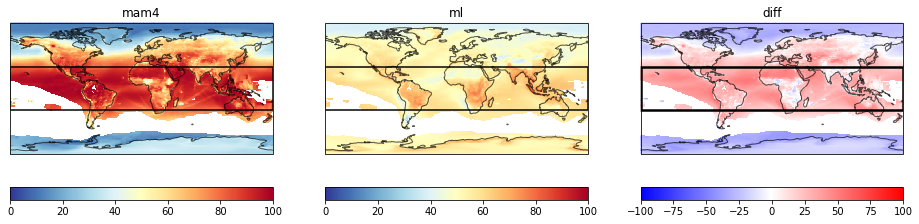

mam4 mean: 87.22962522477145
ml mean: 58.840171813964844
diff mean: 28.389451553976656
abs diff mean: 29.054614996552704
Mode Composition:


,bc,dst,ncl,pom,soa,so4
Aitken,0.000000,0.003466,0.063872,0.000000,0.029267,0.316185
Accumulation,1.675803,8.285770,41.167604,8.485669,16.027595,20.534477
Primary carbon,0.494337,0.000000,0.000000,2.915957,0.000000,0.000000


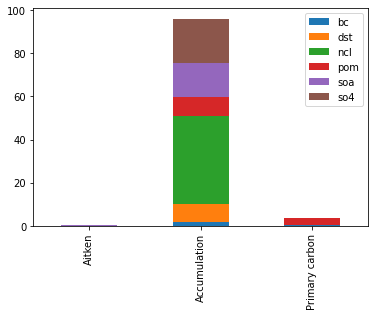

In [5]:
chi = "chi_c"
(lat_min, lat_max, lon_min, lon_max) = (-30,30,-180,180)
workflow(da,chi,lat_min, lat_max, lon_min, lon_max)

## Antarctica

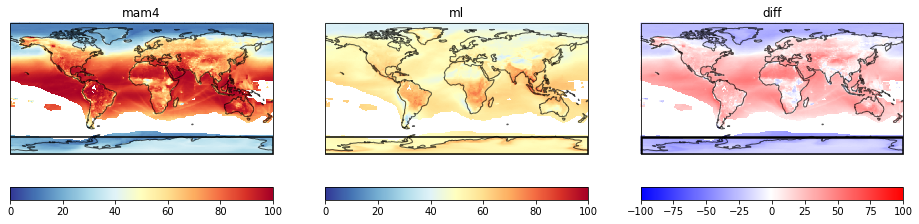

mam4 mean: 30.051034907221894
ml mean: 54.453651428222656
diff mean: -24.40261755621043
abs diff mean: 24.40261755621043
Mode Composition:


,bc,dst,ncl,pom,soa,so4
Aitken,0.000000,0.001395,0.375050,0.000000,0.047077,15.683071
Accumulation,0.277480,1.643955,27.628505,1.776728,2.016034,42.450717
Primary carbon,1.318616,0.000000,0.000000,6.781372,0.000000,0.000000


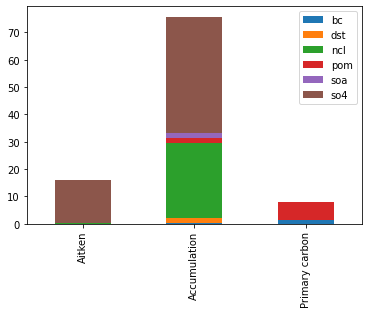

In [6]:
chi = "chi_c"
(lat_min, lat_max, lon_min, lon_max) = (-90,-66.5,-180,180)
workflow(da,chi,lat_min, lat_max, lon_min, lon_max)

## Greenland

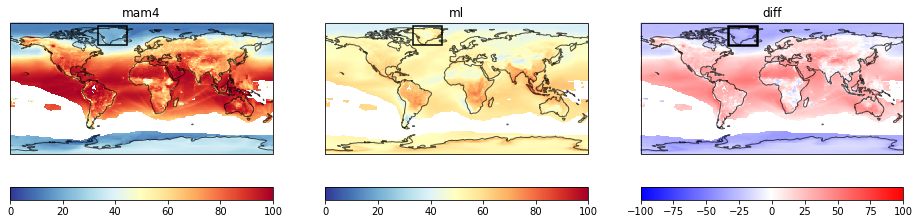

mam4 mean: 23.24109839695089
ml mean: 51.93703079223633
diff mean: -28.695929470436162
abs diff mean: 28.695929470436162
Mode Composition:


,bc,dst,ncl,pom,soa,so4
Aitken,0.000000,0.000324,0.148928,0.000000,0.115110,0.653709
Accumulation,0.732651,1.144486,16.865725,6.569586,5.827707,15.893430
Primary carbon,5.326038,0.000000,0.000000,46.722307,0.000000,0.000000


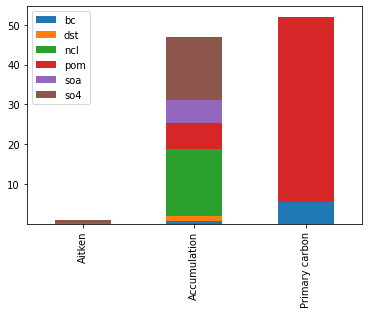

In [7]:
chi = "chi_c"
(lat_min, lat_max, lon_min, lon_max) = (60,85,-60,-20)
workflow(da,chi,lat_min, lat_max, lon_min, lon_max)

## Arctic

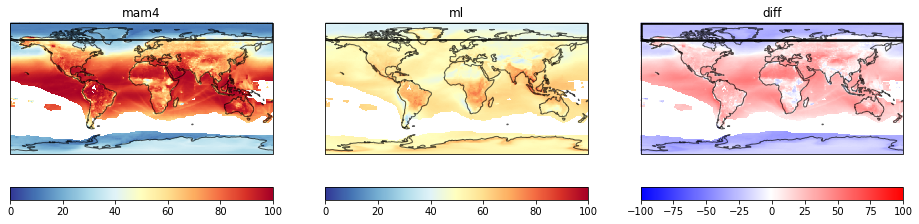

mam4 mean: 20.110446477712703
ml mean: 43.80706024169922
diff mean: -23.696613385701998
abs diff mean: 24.442357247331916
Mode Composition:


,bc,dst,ncl,pom,soa,so4
Aitken,0.000000,0.000241,0.170095,0.000000,0.076367,0.945398
Accumulation,0.708776,1.337973,13.801279,5.556597,8.038871,25.136350
Primary carbon,5.517944,0.000000,0.000000,38.710110,0.000000,0.000000


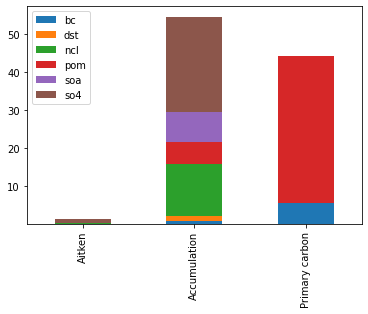

In [8]:
chi = "chi_c"
(lat_min, lat_max, lon_min, lon_max) = (66.5,90,-180,180)
workflow(da,chi,lat_min, lat_max, lon_min, lon_max)